<a href="https://colab.research.google.com/github/TheScienceUniverse/Agro_GIS/blob/master/Agro_GIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing Full GitHub Repository Here
!pwd
!ls
!rm -rf Agro_GIS
!git clone https://github.com/TheScienceUniverse/Agro_GIS.git

/content
Agro_GIS  sample_data
Cloning into 'Agro_GIS'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 80 (delta 34), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (80/80), done.


In [0]:
# importing csv module
import csv

# csv File NAME
f_name = "Agro_GIS/data/agro.csv"

# initializing the titles and rows list
fields = []
rows = []

# reading CSV File
with open(f_name, 'r') as f_csv:
	# creating a CSV Reader object
	r_csv = csv.reader(f_csv)
	# Line COUNT
	l_count = 0
	# read row-by-row
	for row in r_csv:
		# print(row)
		l_count += 1
	print("Total Number of Rows: ", l_count)
f_csv.close()

In [0]:
!sh Agro_GIS/setup.sh

In [0]:
import numpy as p_nm
import scipy as p_sc
import matplotlib as p_mp

import cv2 as p_cv

print("Done")

Done


In [0]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

"""
m = Basemap(projection="mill", \
           llcrnrlat=-90, urcrnrlat=90, \
           llcrnrlon=-180, urcrnrlon=180,\
           resolution='c')

m.drawcoastlines()
m.fillcontinents()

m.drawmapboundary()
plt.title('Quick basemap example!')
plt.show()
"""

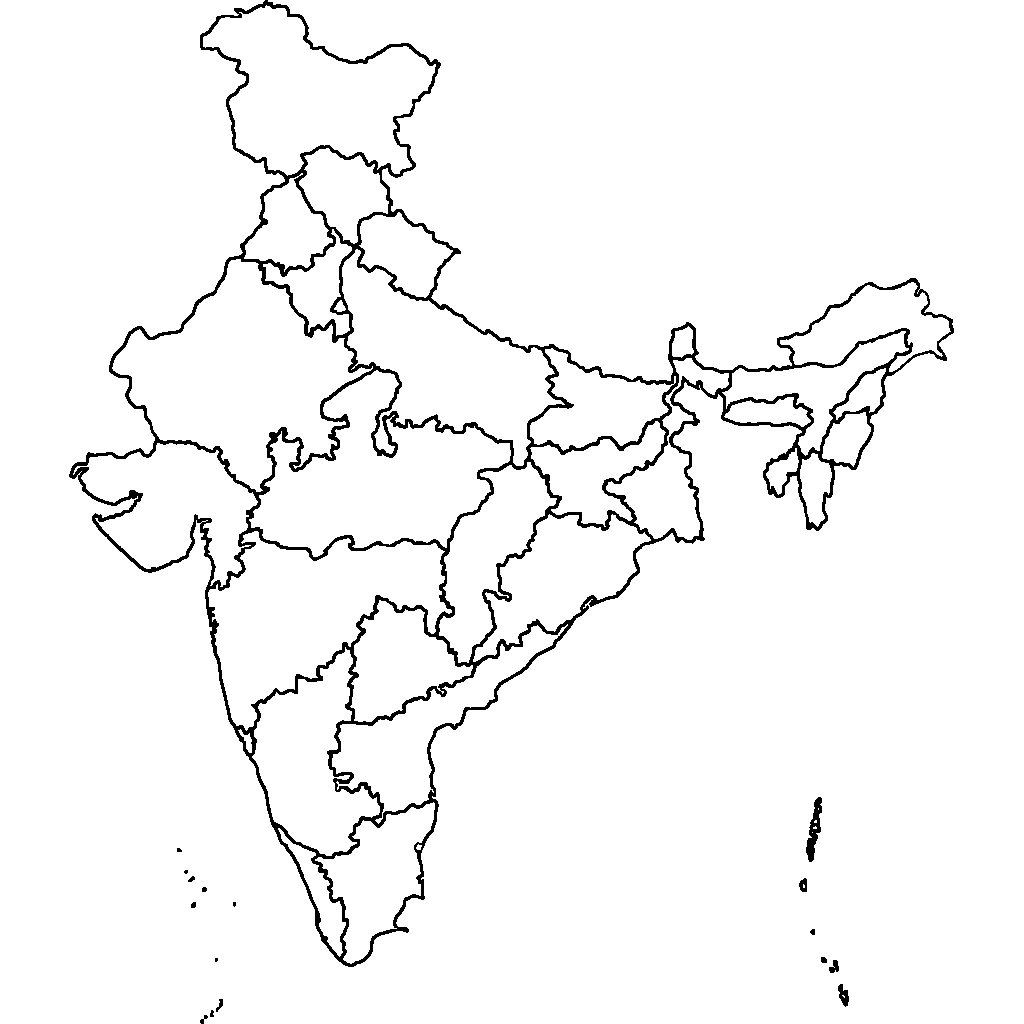

In [5]:
from IPython.display import Image
Image('./Agro_GIS/img/india.jpg', width=500, height=500)